In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('raw_data.csv', index_col=0)

In [3]:
df.head()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
0,-2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.0,0.4,-2.2,-1.8,1.0,0.8223,0.7792,0.7600
2,-2.0,0.8,-2.4,-1.6,2.0,0.8015,0.7545,0.8300
3,-2.0,1.2,-2.6,-1.4,3.0,0.8516,0.8185,0.5429
4,-2.0,1.6,-2.8,-1.2,2.0,0.8309,0.7912,0.6533


In [4]:
df.tail()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
15,-2.0,6.0,-5.0,1.0,2.0,0.8445,0.8083,0.5900
16,-2.0,6.4,-5.2,1.2,4.0,0.8306,0.7935,0.7300
17,-2.0,6.8,-5.4,1.4,2.0,0.8336,0.7946,0.7367
18,-2.0,7.2,-5.6,1.6,3.0,0.8594,0.8282,0.6450
19,-2.0,7.6,-5.8,1.8,5.0,0.8299,0.7939,0.7183


In [5]:
df.drop(0, axis=0, inplace=True)

In [6]:
df.head()

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
index,,,,,,,,
1,-2.0,0.4,-2.2,-1.8,1.0,0.8223,0.7792,0.7600
2,-2.0,0.8,-2.4,-1.6,2.0,0.8015,0.7545,0.8300
3,-2.0,1.2,-2.6,-1.4,3.0,0.8516,0.8185,0.5429
4,-2.0,1.6,-2.8,-1.2,2.0,0.8309,0.7912,0.6533
5,-2.0,2.0,-3.0,-1.0,2.0,0.8366,0.7984,0.7200


In [7]:
df.loc[:, ['vrange', 'num_of_features', 'a_fitness', 'training_score', 'test_score']].describe()

,vrange,num_of_features,a_fitness,training_score,test_score
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,4.000000,2.315789,0.834084,0.795642,0.713905
std,2.250926,0.945905,0.014846,0.018887,0.069647
min,0.400000,1.000000,0.801500,0.754500,0.542900
25%,2.200000,2.000000,0.826100,0.785200,0.698300
50%,4.000000,2.000000,0.836600,0.798400,0.725000
75%,5.800000,2.500000,0.842750,0.806700,0.736700
max,7.600000,5.000000,0.859400,0.828200,0.830000


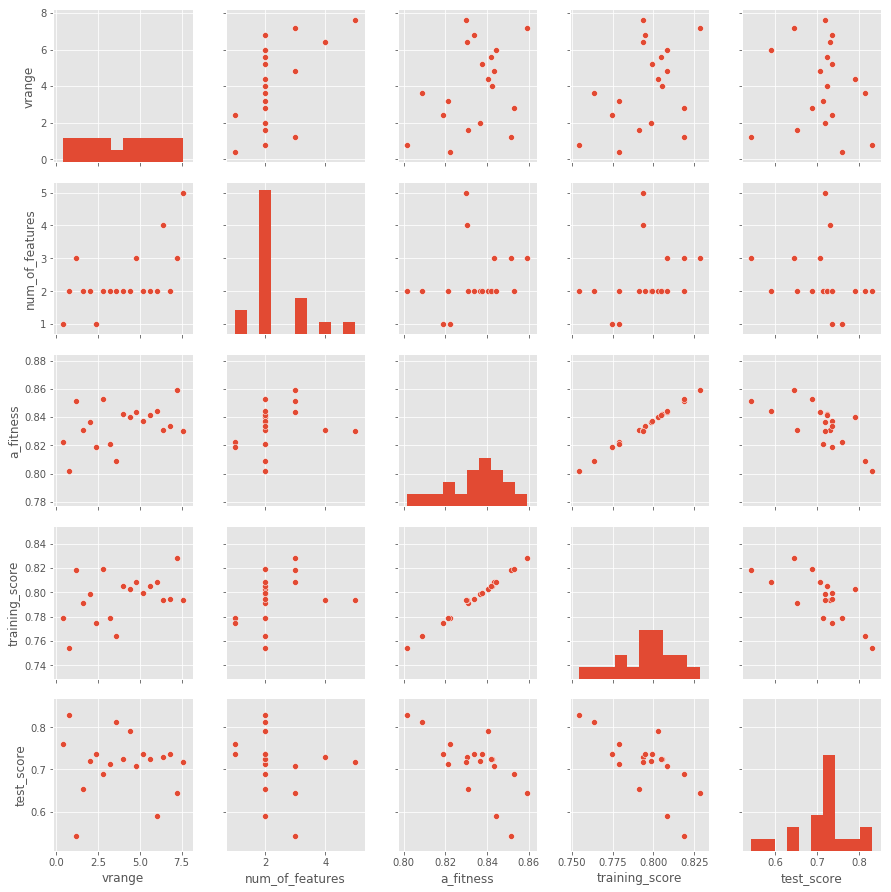

In [8]:
sns.pairplot(df.loc[:, ['vrange', 'num_of_features', 'a_fitness', 'training_score', 'test_score']])
plt.savefig('../../../lab_notebooks/cfs_notebook_files/Tuning_VBounds_Range_vcenter_-2.0_pairplot.svg')

Bizarre. I think I'm seeing a slight linear relationship between fitness and test_score. Which is good. Except that it's negatively linear. 

In [9]:
df.corr(method='pearson')

,vcenter,vrange,vmin,vmax,num_of_features,a_fitness,training_score,test_score
vcenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vrange,NaN,1.000000,-1.000000,1.000000,0.574039,0.375587,0.406150,-0.088169
vmin,NaN,-1.000000,1.000000,-1.000000,-0.574039,-0.375587,-0.406150,0.088169
vmax,NaN,1.000000,-1.000000,1.000000,0.574039,0.375587,0.406150,-0.088169
num_of_features,NaN,0.574039,-0.574039,0.574039,1.000000,0.236555,0.298057,-0.226873
a_fitness,NaN,0.375587,-0.375587,0.375587,0.236555,1.000000,0.997960,-0.692441
training_score,NaN,0.406150,-0.406150,0.406150,0.298057,0.997960,1.000000,-0.695805
test_score,NaN,-0.088169,0.088169,-0.088169,-0.226873,-0.692441,-0.695805,1.000000
